This script generates Democratic and Republican primary linear regression models, tested on both the 2018 senate and governor's primaries, with only a small subset of the original features.

In [224]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [225]:
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


Training R^2:  0.6808405461350777
Mean Absolute Error (MAE): 4.076351656608214
Mean Squared Error (MSE): 34.11467834408807
Testing R^2:  0.6283128214131077
16.981815663495812


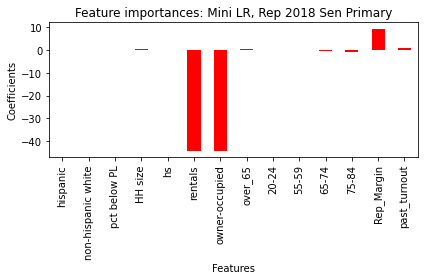

In [226]:
#Test: Create limited Linear Regression Republican Model: 2018 Senate
turnout_train_rep_mod = turnout_train_rep

np.random.seed(5)

#Remove test data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2018]

#Extract features
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party','Runoff', 'Type'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

#Extract outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ",reg.score(model_feats, model_outcome))


#Test model
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Drop columns
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

#Specify outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)



#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: Mini LR, Rep 2018 Sen Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()


Training R^2:  0.6808405461350777
Mean Absolute Error (MAE): 4.122333962103514
Mean Squared Error (MSE): 34.7514141912475
Testing R^2:  0.6221824559352487
16.981815663495812


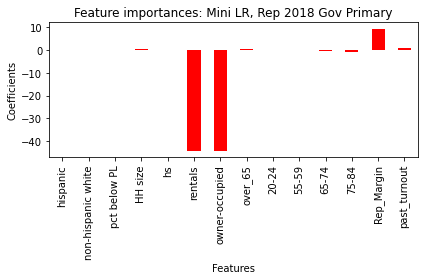

In [227]:
# Test: Create limited Linear Regression Republican Model: 2018 Gov
turnout_train_rep_mod = turnout_train_rep

np.random.seed(5)
#Remove test data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2018]

#Extract features
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

#Extract outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ",reg.score(model_feats, model_outcome))


#Test model
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']

#Drop columns
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

#Specify outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: Mini LR, Rep 2018 Gov Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()


Training R^2:  0.708229819053479
Mean Absolute Error (MAE): 2.7664412073441182
Mean Squared Error (MSE): 13.129507107007816
Testing R^2:  0.6883682635236614
5.187535358780666


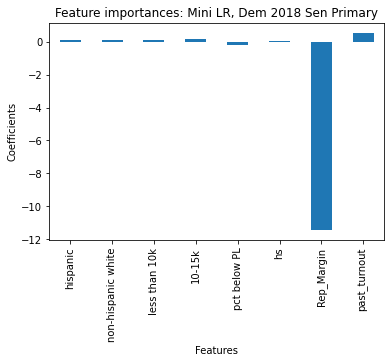

In [228]:
#Test: Create limited Linear Regression Democrat Model: 2018 Senate
turnout_train_dem_mod = turnout_train_dem

np.random.seed(5)

#Remove test data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2018]
#Extract features
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'less than 10k', '10-15k', 'pct below PL', 'hs', 'Rep_Margin', 'past_turnout']]

#Extract outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print('Training R^2: ', reg.score(model_feats, model_outcome))

#Test model
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']
#Drop columns
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
#specify features
model_feats = model_feats[['hispanic', 'non-hispanic white', 'less than 10k', '10-15k', 'pct below PL', 'hs', 'Rep_Margin', 'past_turnout']]

#Specify outcome
model_outcome = turnout_train_dem_mod['Turnout']


pred = reg.predict(model_feats)


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: Mini LR, Dem 2018 Sen Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")



Training R^2:  0.708229819053479
Mean Absolute Error (MAE): 2.7159925633501234
Mean Squared Error (MSE): 11.888701607050905
Testing R^2:  0.6680486652272648
5.187535358780666


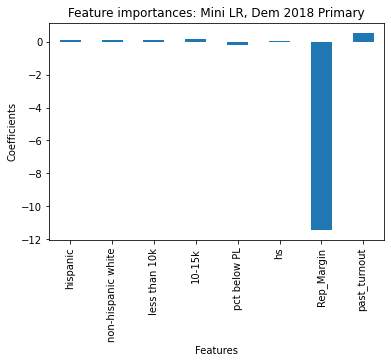

In [229]:
#Test: Create limited Linear Regression Democrat Model: 2018 Governor
turnout_train_dem_mod = turnout_train_dem

np.random.seed(5)
#Remove test data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2018]
#Extract features
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'less than 10k', '10-15k', 'pct below PL', 'hs', 'Rep_Margin', 'past_turnout']]

#Extract outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ", reg.score(model_feats, model_outcome))


#Test model
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Drop columns
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'less than 10k', '10-15k', 'pct below PL', 'hs', 'Rep_Margin', 'past_turnout']]

#Specify outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: Mini LR, Dem 2018 Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")

